In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import mannwhitneyu

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_theme(style="darkgrid", rc={"axes.edgecolor": "black", "grid.color": "black"})

In [3]:
tlc=pd.read_csv("D:\\data science project\\Purwadhika\\Codes\\Modul 2\\NYC TLC Trip Record.csv")
tlc.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24336\157834210.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  tlc=pd.read_csv("D:\\data science project\\Purwadhika\\Codes\\Modul 2\\NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


# Background

## Domain Knowledge

Boro taxis or green taxi are taxicabs in New York City that are allowed to pick up passengers (street hails or calls) in outer boroughs (excluding John F. Kennedy International Airport and LaGuardia Airport unless arranged in advance) and in Manhattan above East 96th and West 110th Streets.

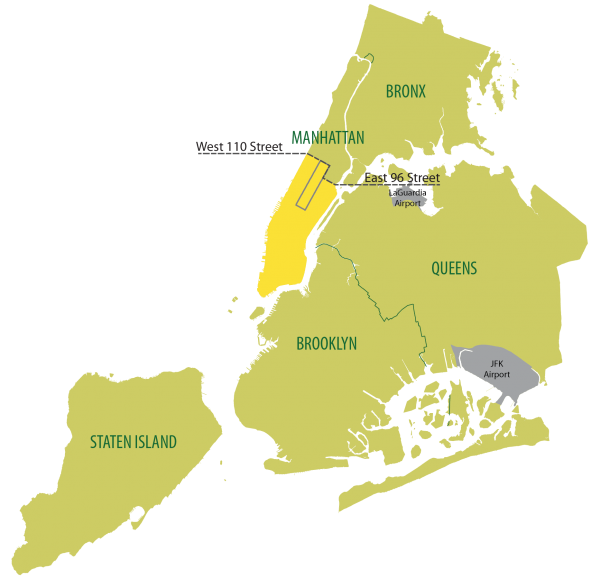

## Problems

<ol>
  <li>When is the best time to allocate the taxi fleet ?</li>
  <li>Is the borough taxi distribution to other borough is even? </li>
  <li>How to improve the borough taxi business in other borough ?</li>
</ol>

## Data Source

The main ata that being used in this analysis was gained from the New York City Taxi and Limousine Commission (NYC TLC), each rows represent a green taxi trip. the secondary data that being used was gained from the nyc open data which contains location data.

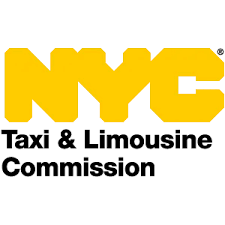

# Data Cleaning

The data cleaning is performed to identify outliers in the dataset, duplicate data, correcting data types which have to be done before performing data analysis in order to get valids insight.

## Data Summary

In [4]:
tlc=pd.read_csv("D:\\data science project\\Purwadhika\\Codes\\Modul 2\\NYC TLC Trip Record.csv")
tlc.shape

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24336\2166812815.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  tlc=pd.read_csv("D:\\data science project\\Purwadhika\\Codes\\Modul 2\\NYC TLC Trip Record.csv")


(68211, 20)

the consisted of 68211 rows and 20 columns

<table>
  <tr>
    <th>Column</th>
    <th>Explanation</th>
  </tr>
  <tr>
    <td>VendorID</td>
    <td>A code indicating the LPEP provider that provided the record. 1 = Creative Mobile Technologies, LLC. 2 = VeriFone Inc.</td>
  </tr>
  <tr>
    <td>lpep_pickup_datetime</td>
    <td>The date and time when the meter was engaged.</td>
  </tr>
  <tr>
    <td>lpep_dropoff_datetime</td>
    <td>The date and time when the meter was disengaged.</td>
  </tr>
  <tr>
    <td>store_and_fwd_flag</td>
    <td>The number of passengers in the vehicle. This is a driver-entered value.</td>
  </tr>
  <tr>
    <td>Trip_distance</td>
    <td>The elapsed trip distance in miles was reported by the taximeter.</td>
  </tr>
  <tr>
    <td>PULocationID</td>
    <td>TLC Taxi Zone in which the taximeter was engaged.</td>
  </tr>
  <tr>
    <td>DOLocationID</td>
    <td>TLC Taxi Zone in which the taximeter was disengaged.</td>
  </tr>
  <tr>
    <td>RateCodeID</td>
    <td>The final rate code is in effect at the end of the trip.1 = Standard rate, 2 = JFK, 3 = Newark, 4 = Nassau or Westchester, 5 = Negotiated fare, 6 = Group ride</td>
  </tr>
  <tr>
    <td>Store_and_fwd_flag</td>
    <td>This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. 
    Y = store and forward trip, N = not a store and forward trip</td>
  </tr>
  <tr>
    <td>Payment_type</td>
    <td>A numeric code signifying how the passenger paid for the trip.1 = Credit card, 2 = Cash, 3 = No charge, 4 = Dispute, 5 = Unknown, 6 = Voided trip</td>
  </tr>
  <tr>
    <td>Fare_amount</td>
    <td>The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.</td>
  </tr>
  <tr>
    <td>Improvement_surcharge</td>
    <td>$0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.</td>
  </tr>
  <tr>
    <td>Tip_amount</td>
    <td>This field is automatically populated for credit card tips. Cash tips are not included.</td>
  </tr>
  <tr>
    <td>Tolls_amount</td>
    <td>The total amount of all tolls paid in the trip.</td>
  </tr>
  <tr>
    <td>Total_amount</td>
    <td>The total amount charged to passengers. Does not include cash tips.</td>
  </tr>
  <tr>
    <td>Trip_type</td>
    <td>A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver. 1 = Street-hail, 2 = Dispatch</td>
  </tr>
</table>

## Data Types Correction

In [5]:
tlc.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

### lpep_pickup_datetime and lpep_dropoff_datetime

In [6]:
tlc["lpep_pickup_datetime"]=pd.to_datetime(tlc["lpep_pickup_datetime"])
tlc["lpep_dropoff_datetime"]=pd.to_datetime(tlc["lpep_dropoff_datetime"])

columns lpep_pickup_datetime and lpep_dropoff_datetime datetime values type are changed into datetime.

## Duplicate Row

In [7]:
print (f" duplicated rows {tlc.duplicated().sum()}")

 duplicated rows 0


## Missing Values

Missing values happens if a data value is Nan, missing values can be handled either by dropping it or imputing. imputation can be done if there are other columns that can be used to predict the values of a column with missing values.

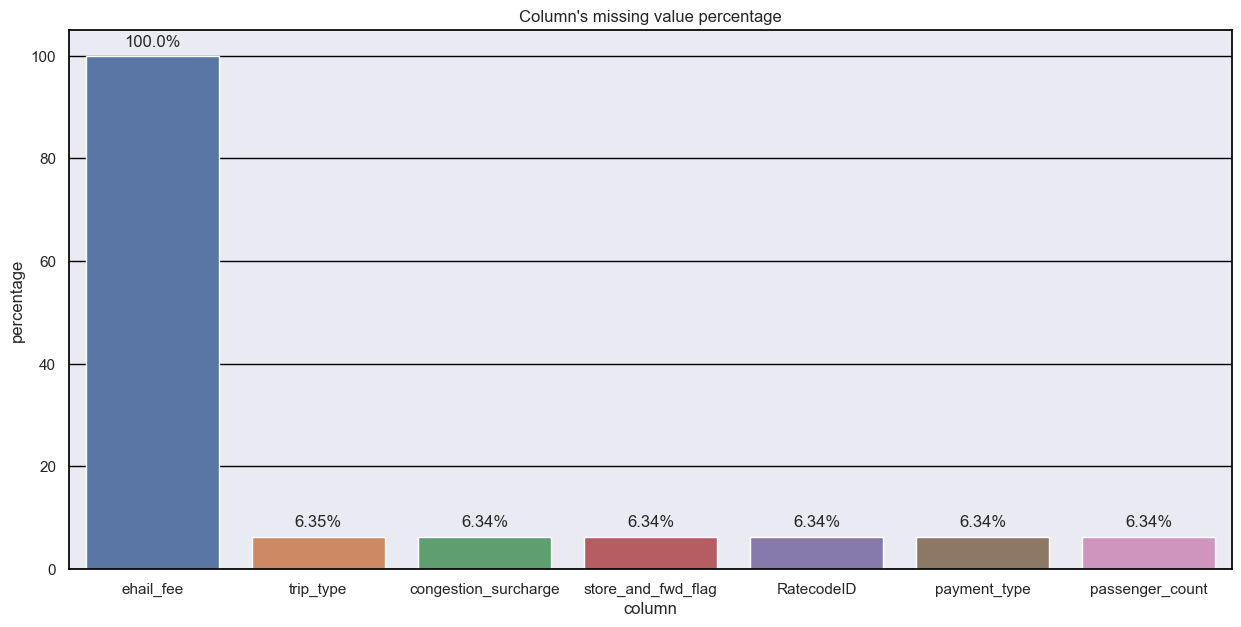

In [8]:
missing=(tlc.isnull().sum()/len(tlc)*100).reset_index().sort_values(by=0,ascending=False)
missing.rename({"index":"column",0:"percentage"},axis=1,inplace=True)
missing=missing[missing["percentage"]>0]
missing["percentage"]=round(missing["percentage"],2)

plt.subplots(figsize=(15, 7))
ax=sns.barplot(missing,x="column",y="percentage")
plt.title("Column's missing value percentage")

for p in ax.patches:
    percentage = f'{p.get_height()}%'  # Format the percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.savefig("a.png",transparent=True)


The barplot above shows that there are 7 columns with missing value, The column "ehail_fee" has all it's value missing, while other columun has an average of 6.35% missing value

In [9]:
tlc.drop(["ehail_fee"],axis=1,inplace=True)

The column "ehail_fee" is dropped because all of it's value are missing

In [10]:
tlc_missing=tlc[tlc.isna().any(axis=1)]
tlc_missing.describe(include=[np.number])

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,4334.000000,10.0,4334.000000,4334.000000,10.0,4334.000000,4334.000000,4334.00000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,10.0,0.0,10.0
mean,1.968159,99.0,110.628519,140.214813,1.0,89.735311,24.401052,0.01419,0.019266,3.576091,0.544647,0.987563,30.461880,1.0,NaN,0.0
std,0.175598,0.0,74.246609,74.921174,0.0,2319.797742,13.879334,0.20684,0.112809,3.454050,1.941783,0.092482,17.480215,0.0,NaN,0.0
min,1.000000,99.0,3.000000,1.000000,1.0,0.000000,-43.540000,0.00000,0.000000,0.000000,0.000000,0.300000,-41.780000,1.0,NaN,0.0
25%,2.000000,99.0,42.000000,74.000000,1.0,1.770000,14.520000,0.00000,0.000000,1.000000,0.000000,1.000000,18.345000,1.0,NaN,0.0
50%,2.000000,99.0,75.000000,141.000000,1.0,3.360000,20.310000,0.00000,0.000000,2.930000,0.000000,1.000000,25.340000,1.0,NaN,0.0
75%,2.000000,99.0,166.000000,202.750000,1.0,6.110000,30.417500,0.00000,0.000000,5.000000,0.000000,1.000000,37.890000,1.0,NaN,0.0
max,2.000000,99.0,265.000000,265.000000,1.0,120098.840000,181.070000,7.50000,1.500000,40.000000,21.300000,1.000000,200.280000,1.0,NaN,0.0


In [11]:
tlc_missing.describe(exclude=[np.number])

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,4334,4334,10
unique,NaN,NaN,1
top,NaN,NaN,N
freq,NaN,NaN,10
mean,2023-01-16 15:37:27.910705920,2023-01-16 15:57:23.138209536,NaN
min,2023-01-01 00:27:00,2023-01-01 00:37:00,NaN
25%,2023-01-09 08:23:30,2023-01-09 08:58:00,NaN
50%,2023-01-17 07:44:30,2023-01-17 08:07:00,NaN
75%,2023-01-24 08:15:15,2023-01-24 08:28:30,NaN
max,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN


In [12]:
tlc.dropna(inplace=True)

The rows with missing values are dropped because imputation would probably lead to bias and there are no patterns in these missing value beside it happens in the same observation.

## Adding location data into the dataframe

In [13]:
loc=pd.read_csv("D:\data science project\Purwadhika\Codes\Modul 2\\taxi_zones.csv")
loc_1=loc.rename(columns={"OBJECTID":"PULocationID","zone":"PUzone","borough":"PUborough","the_geom":"PUgeom"})
loc_2=loc.rename(columns={"OBJECTID":"DOLocationID","zone":"DOzone","borough":"DOborough","the_geom":"DOgeom"})
loc_1.drop(columns=["Shape_Leng","Shape_Area","LocationID"],inplace=True)
loc_2.drop(columns=["Shape_Leng","Shape_Area","LocationID"],inplace=True)
tlc=pd.merge(tlc,loc_1,how="left",on="PULocationID")
tlc=pd.merge(tlc,loc_2,how="left",on="DOLocationID")
tlc.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUgeom,PUzone,PUborough,DOgeom,DOzone,DOborough
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,MULTIPOLYGON (((-73.95707738499995 40.81429809...,Morningside Heights,Manhattan,MULTIPOLYGON (((-73.98162787399998 40.78032893...,Lincoln Square West,Manhattan
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,MULTIPOLYGON (((-73.95953658899997 40.79871852...,Bloomingdale,Manhattan,MULTIPOLYGON (((-73.97255352299985 40.76489773...,Central Park,Manhattan
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,MULTIPOLYGON (((-73.90649492923363 40.79018099...,Steinway,Queens,MULTIPOLYGON (((-73.93290347544752 40.77794449...,Old Astoria,Queens
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,MULTIPOLYGON (((-73.94773985499985 40.80959972...,Central Harlem,Manhattan,MULTIPOLYGON (((-73.96884378999985 40.78596738...,Upper West Side North,Manhattan
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,MULTIPOLYGON (((-73.94773985499985 40.80959972...,Central Harlem,Manhattan,MULTIPOLYGON (((-73.93380589881859 40.81651249...,East Harlem North,Manhattan


## Creating New Variabel

In [14]:
tlc["day"]=tlc["lpep_pickup_datetime"].dt.day_of_week
tlc["day_name"]=tlc["lpep_pickup_datetime"].dt.day_name()
tlc["dayofyear"]=tlc["lpep_pickup_datetime"].dt.day_of_year
tlc["hour"]=tlc["lpep_pickup_datetime"].dt.hour
def jenis(x):
    if x==5 or x==6 :
        return "weekend"
    else:
        return "weekday"
tlc["type_of_day"]=tlc["day"].apply(jenis)
tlc["month"]=tlc["lpep_pickup_datetime"].dt.month
tlc["trip_dur"]=(tlc["lpep_dropoff_datetime"]-tlc["lpep_pickup_datetime"]).dt.total_seconds()/3600
tlc["trip_speed(mph)"]=tlc["trip_distance"]/tlc["trip_dur"]

New variabel that created are 

<ul>
  <li>"day", "day_name" , "dayofyear", "type_of_day" , "hour" , "week" , "month" are created from column "lpep_pickup_datetime" to perform time series analysis</li>
  <li>"trip_dur" is created from substracting "lpep_dropoff_datetime" and "lpep_pickup_datetime" divided by 3600 to create new variables and identify outliers</li>
  <li>"trip_speed(mph)" is to help identify outliers</li>
</ul>


## Outlier Detection

Outlier must be removed from analysis to prevent bias. Outlier is an observation that comes from different population, for example: an observation of yellow taxi data in green taxi data

### Date 

the data should only contain trip from january 2023

In [15]:
tlc["month"].value_counts()

month
1     63874
12        2
2         1
Name: count, dtype: int64

In [16]:
tlc=tlc[tlc["month"]==1]

There are 2 rows from December and 1 row from february, those data will be dropped

### Congestion Surcharge 

In [17]:
tlc["congestion_surcharge"].value_counts()

congestion_surcharge
 0.00    46984
 2.75    16871
 2.50       16
-2.75        3
Name: count, dtype: int64

In [18]:
tlc=tlc[tlc["congestion_surcharge"]!=2.50]

Obeservation with "congestion_surcharge" 2.5 are dropped because it belong to yellow taxi

In [19]:
tlc["congestion_surcharge"]=tlc["congestion_surcharge"].abs()

Observation with negative "congestion_surcharge" are converted into positive

### Pasengger Count

In [20]:
tlc["passenger_count"].value_counts()

passenger_count
1.0    54273
2.0     5093
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

In [21]:
tlc=tlc[tlc["passenger_count"]!=0]

There are total 336 trips that have 0 passengers, passengger's count could be zero if the taxi is performing delivery services, these obeservation will be dropped because the analysis is about pasengger trip, not delivery services. 

### Trip Distance 

Text(0.5, 1.0, "taxi's trip distance")

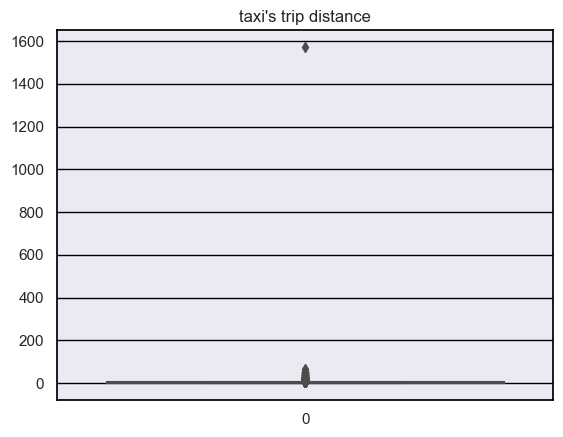

In [22]:
sns.boxplot(tlc["trip_distance"])

plt.title("taxi's trip distance")

In [23]:
print(tlc["trip_distance"].max())
print(tlc["trip_distance"].min())

1571.97
0.0


In [24]:
tlc[(tlc["trip_distance"]==1571.97) | (tlc["trip_distance"]==0)]["trip_distance"].count()

3160

In [25]:
tlc=tlc[(tlc["trip_distance"] != tlc["trip_distance"].max())  & (tlc["trip_distance"] != 0)]

There are 3160 obeservation with trip distance 0 miles and 1571.97 miles, these values are dropped because trip with 0 distance means that the trip didn't happen or cancelled, while the trip with 

### Trip Duration

Text(0.5, 1.0, "taxi's trip duration")

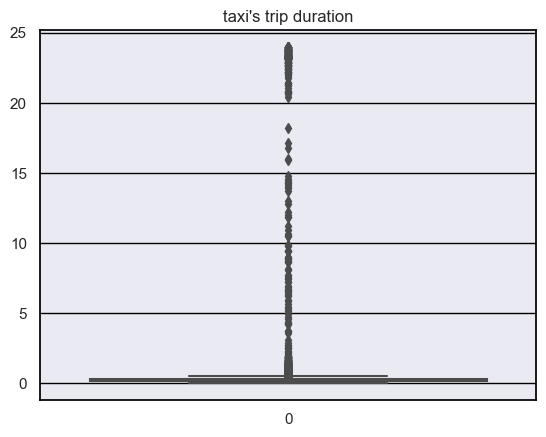

In [26]:
sns.boxplot(tlc["trip_dur"])

plt.title("taxi's trip duration")

In [27]:
print(tlc[tlc["trip_dur"]==0]["trip_dur"].count())
print(tlc[tlc["trip_dur"]>=12]["trip_dur"].count())

4
196


In [28]:
tlc=tlc[(tlc["trip_dur"] != 0)  & (tlc["trip_dur"] <= 12)]

200 obeservation with trip duration with 0 hour and above 12 hours are dropped because taxi with trip duration 0 hours means that the trip was cancelled or didn't happen, while the trip with trip duration above 12 hours operating are prohibited.

### Fare Amount

In [29]:
len(tlc[tlc["total_amount"]<=0].value_counts())

109

In [30]:
fare_amount_negative=tlc[(tlc["fare_amount"]<0) | (tlc["extra"]<0) | (tlc["mta_tax"]<0) | (tlc["tip_amount"]<0) | (tlc["tolls_amount"]<0) | (tlc["improvement_surcharge"]<0) | (tlc["total_amount"]<0)]
fare_amount_negative[["fare_amount","extra","mta_tax","tip_amount","tolls_amount","improvement_surcharge","total_amount"]].describe()


,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,105.000000,105.000000,105.000000,105.0,105.0,105.000000,105.000000
mean,-5.576190,-0.828571,-0.480952,0.0,0.0,-0.966667,-7.930952
std,7.023484,1.039667,0.096172,0.0,0.0,0.149786,7.026219
min,-70.000000,-2.500000,-0.500000,0.0,0.0,-1.000000,-71.500000
25%,-6.500000,-1.000000,-0.500000,0.0,0.0,-1.000000,-8.400000
50%,-3.700000,0.000000,-0.500000,0.0,0.0,-1.000000,-6.900000
75%,-3.000000,0.000000,-0.500000,0.0,0.0,-1.000000,-5.200000
max,0.000000,0.000000,0.000000,0.0,0.0,-0.300000,-1.500000


In [31]:
fare_amount_negative.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUgeom,PUzone,PUborough,DOgeom,DOzone,DOborough,day,day_name,dayofyear,hour,type_of_day,month,trip_dur,trip_speed(mph)
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,MULTIPOLYGON (((-73.94103496899987 40.79254666...,East Harlem South,Manhattan,MULTIPOLYGON (((-73.93380589881859 40.81651249...,East Harlem North,Manhattan,6,Sunday,1,14,weekend,1,0.007222,23.538462
1316,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0,MULTIPOLYGON (((-73.87586503899996 40.76605165...,Jackson Heights,Queens,MULTIPOLYGON (((-73.86768504899995 40.74407171...,Elmhurst,Queens,0,Monday,2,2,weekday,1,0.130278,4.912580
1685,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4.0,1.0,0.0,MULTIPOLYGON (((-73.94103496899987 40.79254666...,East Harlem South,Manhattan,MULTIPOLYGON (((-73.94103496899987 40.79254666...,East Harlem South,Manhattan,0,Monday,2,12,weekday,1,0.054722,14.071066
1863,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3.0,1.0,0.0,MULTIPOLYGON (((-73.94103496899987 40.79254666...,East Harlem South,Manhattan,MULTIPOLYGON (((-73.94103496899987 40.79254666...,East Harlem South,Manhattan,0,Monday,2,13,weekday,1,0.019167,4.173913
2479,2,2023-01-02 19:03:48,2023-01-02 19:04:24,N,1.0,130,130,1.0,0.11,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,MULTIPOLYGON (((-73.76962552399995 40.71178631...,Jamaica,Queens,MULTIPOLYGON (((-73.76962552399995 40.71178631...,Jamaica,Queens,0,Monday,2,19,weekday,1,0.010000,11.000000


After further research, the rows with negative "fare_amount" also have negative "mta_tax", "extra", "tip_amount". maybe the negative value happens because an error while inputing the data. Instead of dropping rows with negative "fare_amount", "extra", "mta_tax", and "tip_amount", the values are transformed into positive.

In [32]:
tlc['fare_amount'] = tlc['fare_amount'].abs()
tlc['extra'] = tlc['extra'].abs()
tlc['mta_tax'] = tlc['mta_tax'].abs()
tlc['tip_amount'] = tlc['tip_amount'].abs()
tlc['tolls_amount'] = tlc['tolls_amount'].abs()
tlc['improvement_surcharge'] = tlc['improvement_surcharge'].abs()
tlc['total_amount'] = tlc['total_amount'].abs()

In [33]:
tlc[(tlc["fare_amount"]==0) | (tlc["total_amount"]==0)][["fare_amount","total_amount"]].count()

fare_amount     18
total_amount    18
dtype: int64

In [34]:
tlc=tlc[(tlc["fare_amount"]!=0) | (tlc["total_amount"]!=0)]

There are also observation with 0 values for column "fare_amount" and "total_amount", those observation are dropped because it's imposibble from business process prespective

### Pick Up and Drop Out location

In [35]:
tlc[(tlc["PULocationID"]==265) | (tlc["PULocationID"]==264)]["PULocationID"].value_counts().reset_index().sort_values(by="PULocationID",ascending=False).head()

,PULocationID,count
1,265,23
0,264,26


In [36]:
tlc=tlc[(tlc["PULocationID"]!=265) & (tlc["PULocationID"]!=264)]

In [37]:
tlc[(tlc["DOLocationID"]==265) | (tlc["DOLocationID"]==264)]["DOLocationID"].value_counts().reset_index().sort_values(by="DOLocationID",ascending=False).head()

,DOLocationID,count
0,265,172
1,264,97


In [38]:
tlc=tlc[(tlc["DOLocationID"]!=265) & (tlc["DOLocationID"]!=264)]

there are 318 observation that have "PULocationID" and "DOLocationID" with values 264 and 265 these observation are dropped because it's mean that the pick up and drop location are unknown 

### Trip Speed

Text(0.5, 1.0, "taxi's trip speed")

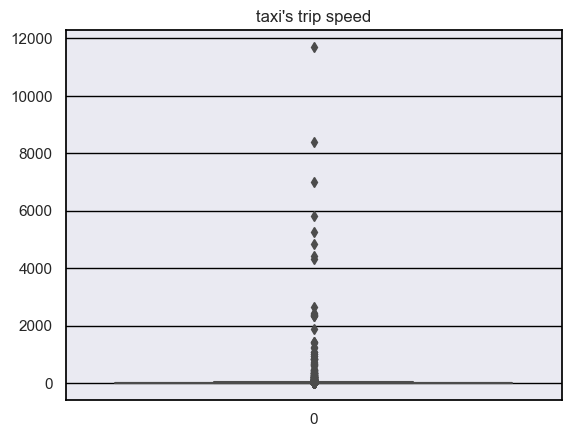

In [39]:
sns.boxplot(tlc["trip_speed(mph)"])

plt.title("taxi's trip speed")

In [40]:
tlc[tlc["trip_speed(mph)"]>65]["trip_speed(mph)"].count()

126

In [41]:
tlc=tlc[tlc["trip_speed(mph)"]<=70]

126 observation with trip speeds above 10 mph are dropped because the speed limit at New York City is 70 mph

### Vendor ID

In [42]:
tlc["VendorID"].value_counts()

VendorID
2    52401
1     7310
Name: count, dtype: int64

There is no outlier for column "VendorID"

### RatecodeID

In [43]:
tlc["RatecodeID"].value_counts()

RatecodeID
1.0    58761
5.0      805
2.0      130
3.0       12
4.0        3
Name: count, dtype: int64

There is no outlier for column "RatecodeID"

### payment_type

In [44]:
tlc["payment_type"].value_counts()

payment_type
1.0    37879
2.0    21497
3.0      270
4.0       65
Name: count, dtype: int64

There is no outlier for column "payment_type"

# Data Analysis

### When is The Most Busy Time ?

In this part, we are looking for the peroid where the taxi trips numbers are high, by finding such pattern, we could know when is the best time to allocate the taxi's fleet

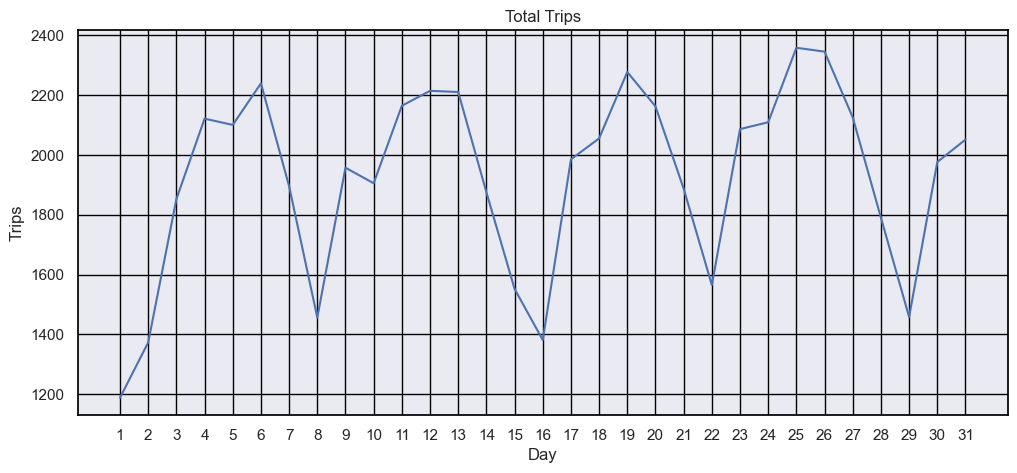

In [45]:
data=tlc[["dayofyear"]].value_counts().reset_index().sort_values(by="dayofyear")

#create plot
fig,ax=plt.subplots(figsize=(12, 5))
sns.lineplot(data=data,x="dayofyear",y="count",ax=ax)

#modify plot
ax.set_title("Total Trips")
ax.set_xticks(data["dayofyear"])
ax.set_xlabel("Day")
ax.set_ylabel("Trips")

plt.savefig("a.png",transparent=True)
plt.show()

It seems that the taxi trip number rises at the start of weekdays and declines in weekend. This statement will be analyzed further

In [46]:
data=tlc[["dayofyear","day","type_of_day"]].value_counts().reset_index()

weekday=data[data["type_of_day"]=="weekday"]["count"]
weekend=data[data["type_of_day"]=="weekend"]["count"]
print(f"the sample size of weekday trip is {len(weekday)} and weekend trip is {len(weekend)}")
display(shapiro(weekday).pvalue)
display(shapiro(weekend).pvalue)

the sample size of weekday trip is 22 and weekend trip is 9


0.0011151102371513844

0.23499345779418945

the result of shapiro wilk test shows that the distribution of daily trip in weekdays's data doesn't follow the normal, therefore median will be used as statistics to describe the the central tendency of trip in weekday vs weekend .

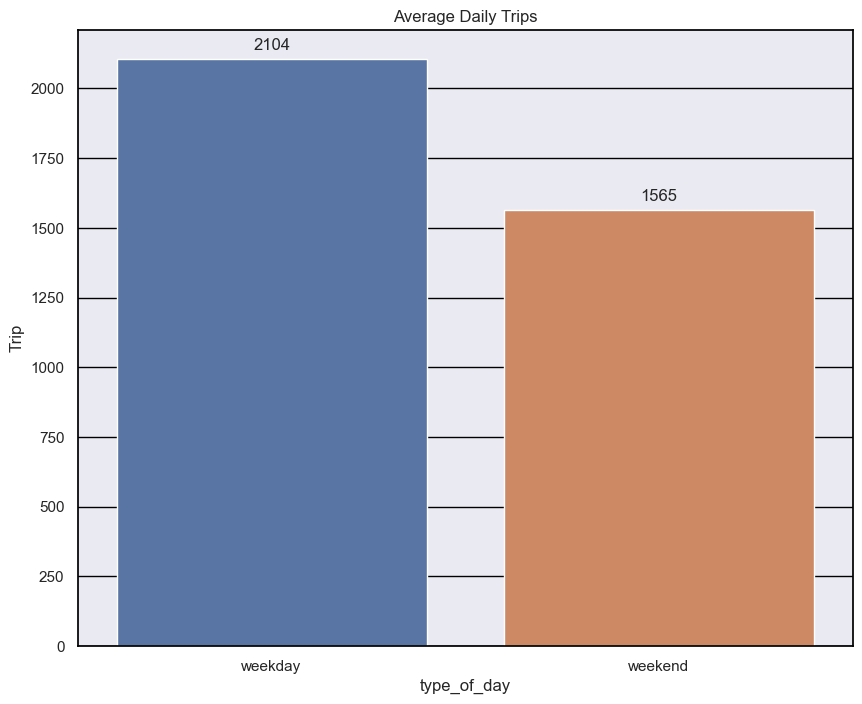

In [47]:
fig,ax=plt.subplots(figsize=(10, 8))
sns.barplot(data=data,x="type_of_day",y="count",errorbar=('ci', False),estimator="median",ax=ax)
plt.title("Average Daily Trips")
ax.set_ylabel("Trip")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig("a.png",transparent=True)

The data visualization shows that median daily trips on weekdays are higher than weekends. To strenghten this statement further, statistical test will be conducted. statistical test that will be used is the non parametric test (one tailed mann whitney u test) to compare the means of both group.

In [48]:
mannwhitneyu(weekday, weekend, alternative='greater').pvalue

0.00027029498008123863

the result of one tailed mann whitneyu test shows that the daily trip on weekdays are higher compared to weekend. 

After analyzed the difference of taxi trip's numbers in weekend and weekdays, the analysis will compare each day to gain more insight. To decide what kind of central tendency that can be used, shapiro wilk on each day is conducted

In [49]:
data=tlc[["day","dayofyear"]].value_counts().reset_index().sort_values(by="day")

for i in range(data["day"].nunique()):
    if shapiro(data[data["day"]==i]["count"]).pvalue<0.05:
        print("The data is not normally distributed")
    else:
        print("The data is normally distributed")

The data is normally distributed
The data is normally distributed
The data is normally distributed
The data is normally distributed
The data is normally distributed
The data is normally distributed
The data is normally distributed


Shapiro wilk test that has been conducted on each group suggest that all of the data in day's group follows the normal distribution, therefore the centarl tendency that will be used is average

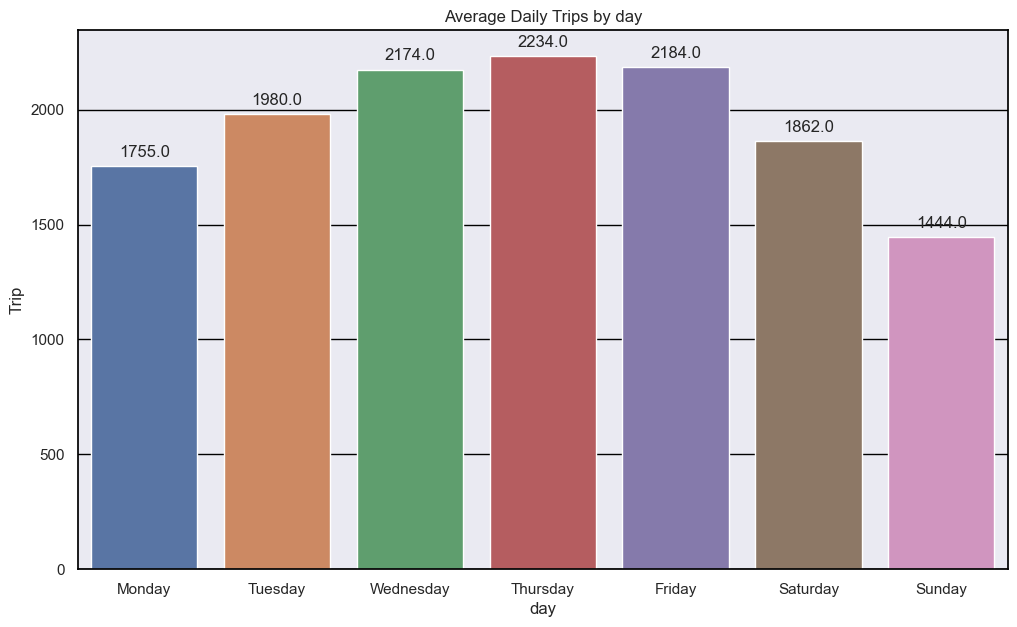

In [50]:
mapping = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
Average_daily_Trip=data.groupby("day")["count"].mean().reset_index().sort_values(by="day")
Average_daily_Trip["count"]=round(Average_daily_Trip["count"])

fig,ax=plt.subplots(figsize=(12, 7))
sns.barplot(data=Average_daily_Trip,x="day",y="count",)
ax.set_title("Average Daily Trips by day")
ax.set_xticklabels([mapping[day] for day in Average_daily_Trip["day"]])
ax.set_ylabel("Trip")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.savefig("a.png",transparent=True)
plt.show()

The barplot above shows that, the average daily trip on each day is varying. To prove this statement, statistical test will be conducted, before peforming the test, the variances of the data's group will be tested to decide which statistical test that can be used to compare each day average daily trips. 

In [51]:
levene(data[data["day"]==0]["count"],
            data[data["day"]==1]["count"],
            data[data["day"]==2]["count"],
            data[data["day"]==3]["count"],
            data[data["day"]==4]["count"],
            data[data["day"]==5]["count"],
            data[data["day"]==6]["count"])

LeveneResult(statistic=1.5140447908420984, pvalue=0.21609278689657338)

The levene test's result suggest that all of the group has equal variance, therefore the tukey's honestly significance difference test will be used

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

mapping = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

tukey_results = pairwise_tukeyhsd(data['count'], data['day'])
tukey_table = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
tukey_table=tukey_table[tukey_table["reject"]==True]
tukey_table["group1"] = tukey_table["group1"].astype(int).map(mapping)
tukey_table["group2"] = tukey_table["group2"].astype(int).map(mapping)

tukey_table

,group1,group2,meandiff,p-adj,lower,upper,reject
1,Monday,Wednesday,419.90,0.0203,47.0302,792.7698,True
2,Monday,Thursday,479.40,0.0061,106.5302,852.2698,True
3,Monday,Friday,429.40,0.0168,56.5302,802.2698,True
10,Tuesday,Sunday,-536.60,0.0009,-888.1450,-185.0550,True
14,Wednesday,Sunday,-730.70,0.0000,-1103.5698,-357.8302,True
17,Thursday,Sunday,-790.20,0.0000,-1163.0698,-417.3302,True
19,Friday,Sunday,-740.20,0.0000,-1113.0698,-367.3302,True
20,Saturday,Sunday,-417.95,0.0211,-790.8198,-45.0802,True


The tukey HSD test's results suggest that Wednesday, Thursday, and Friday have higher average daily trips than monday and sunday has lower average daily trips than Tuesday, Wednesday, Thursday, Friday, and Saturday.

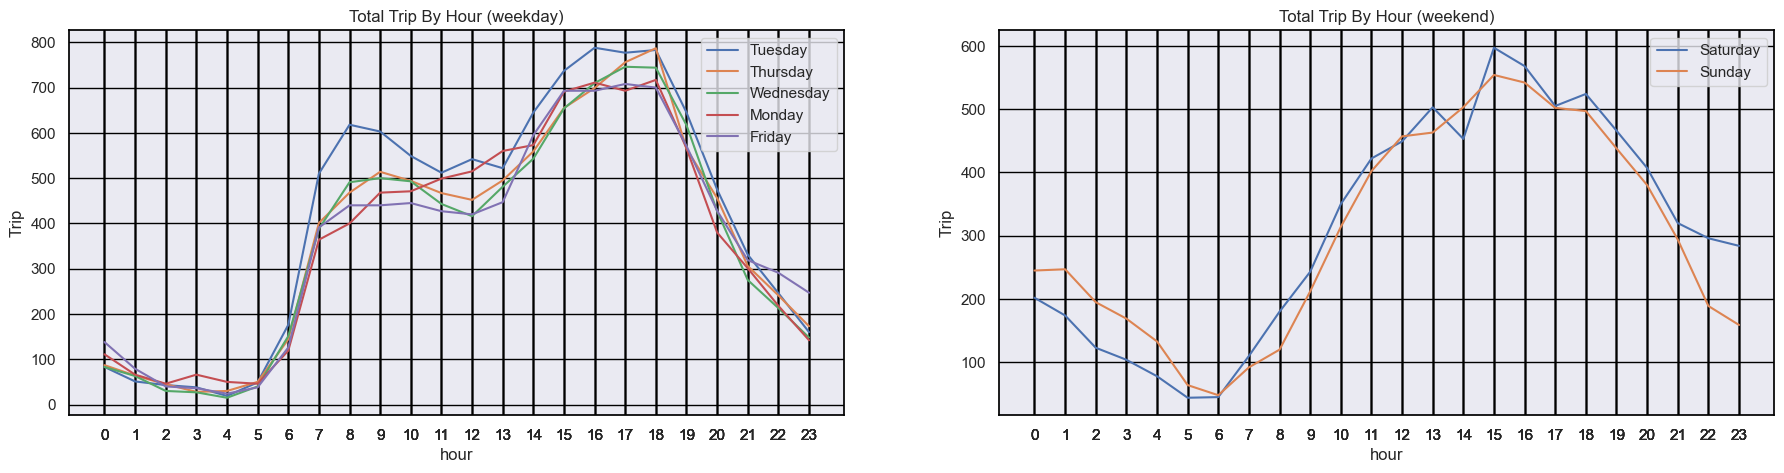

In [53]:
data=tlc[["day_name","type_of_day","hour"]].value_counts().reset_index()
weekday=data[data["type_of_day"]=="weekday"]
weekend=data[data["type_of_day"]=="weekend"]

fig,ax=plt.subplots(1,2,figsize=(22, 5))
sns.lineplot(ax=ax[0],data=weekday,x="hour",y="count",hue="day_name")
ax[0].set_title("Total Trip By Hour (weekday)")
ax[0].set_xticks(weekday["hour"])
ax[0].legend(loc="upper right")
ax[0].set_ylabel("Trip")

sns.lineplot(ax=ax[1],data=weekend,x="hour",y="count",hue="day_name")
ax[1].set_title("Total Trip By Hour (weekend)")
ax[1].set_xticks(weekday["hour"])
ax[1].legend(loc="upper right")
ax[1].set_ylabel("Trip")

plt.savefig("a.png",transparent=True)

The line plot shows that the taxi trip numbers rises when near and in rush hour which is in 6:00 am to 9:00 am when people are commuting to work place and school, and 4:00 pm to 7:00 pm when people are coming back from it.

### Where does the majority of taxi's trip pickup made?

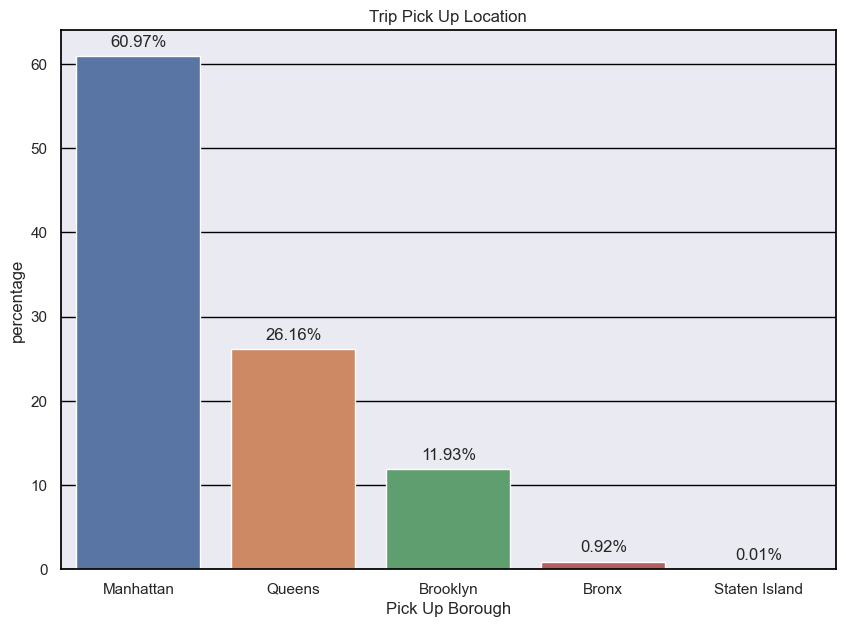

In [54]:
trip_pu_bor=tlc["PUborough"].value_counts(normalize=True).reset_index().sort_values(by="proportion",ascending=False)
trip_pu_bor["proportion"]=round(trip_pu_bor["proportion"]*100,2)
trip_pu_bor.rename({"proportion":"percentage"},inplace=True,axis=1)


fig,ax=plt.subplots(figsize=(10, 7))
sns.barplot(data=trip_pu_bor,x="PUborough",y="percentage",order=trip_pu_bor["PUborough"],ax=ax)
plt.title("Trip Pick Up Location")
ax.set_xlabel("Pick Up Borough")

for p in ax.patches:
    percentage = f'{p.get_height()}%'  # Format the percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig("a.png",transparent=True)

60% of trips were made in Manhattan, this means that the taxi trip distribution to other borough is still low, the analysis below will be focused on why does this phenomenon happens.

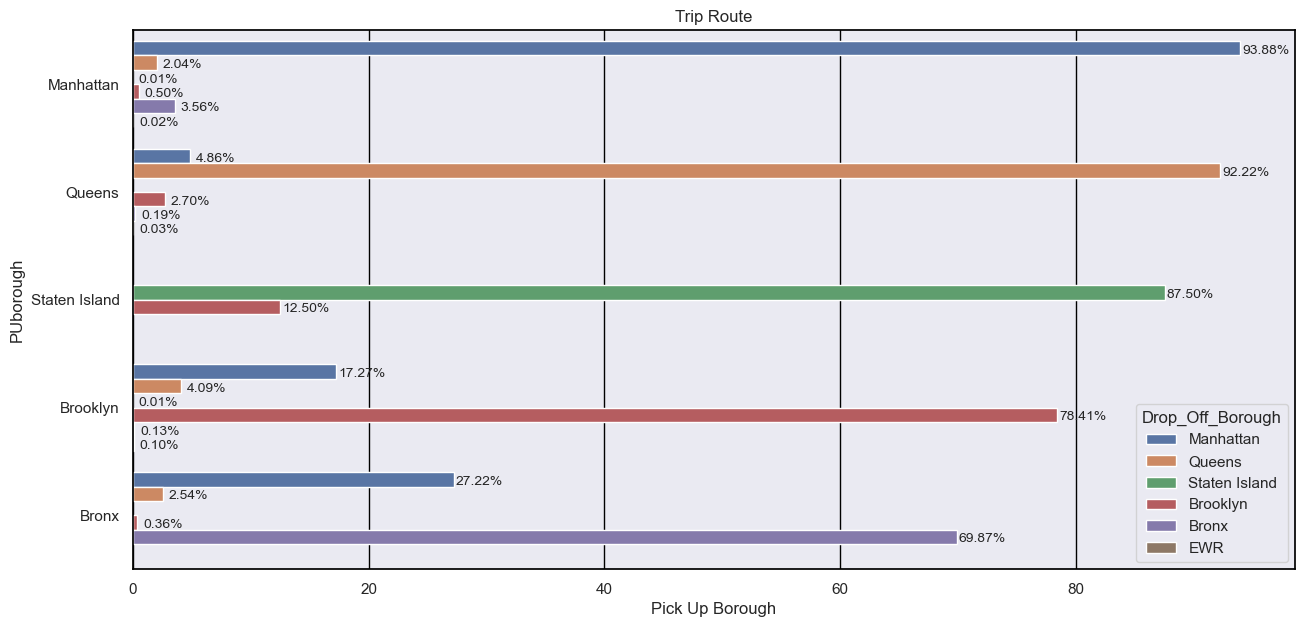

In [ ]:
trip_route=tlc.groupby("PUborough")["DOborough"].value_counts(normalize=True).reset_index().sort_values(by="proportion",ascending=False)
trip_route["proportion"]=round(trip_route["proportion"]*100,2)
trip_route.rename({"proportion":"percentage","DOborough":"Drop_Off_Borough"},inplace=True,axis=1)

fig,ax=plt.subplots(figsize=(15, 7))
sns.barplot(data=trip_route,y="PUborough",x="percentage",hue="Drop_Off_Borough",ax=ax)
plt.title("Trip Route")
ax.set_xlabel("Pick Up Borough")

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width()+1, p.get_y() + p.get_height()/1.5),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points', fontsize=10)


plt.savefig("a.png",transparent=True)

The graphic above shows that the majority trip's drop off location is the sama as it's pick up location. This means that taxi is commonly being used as short distance transportation

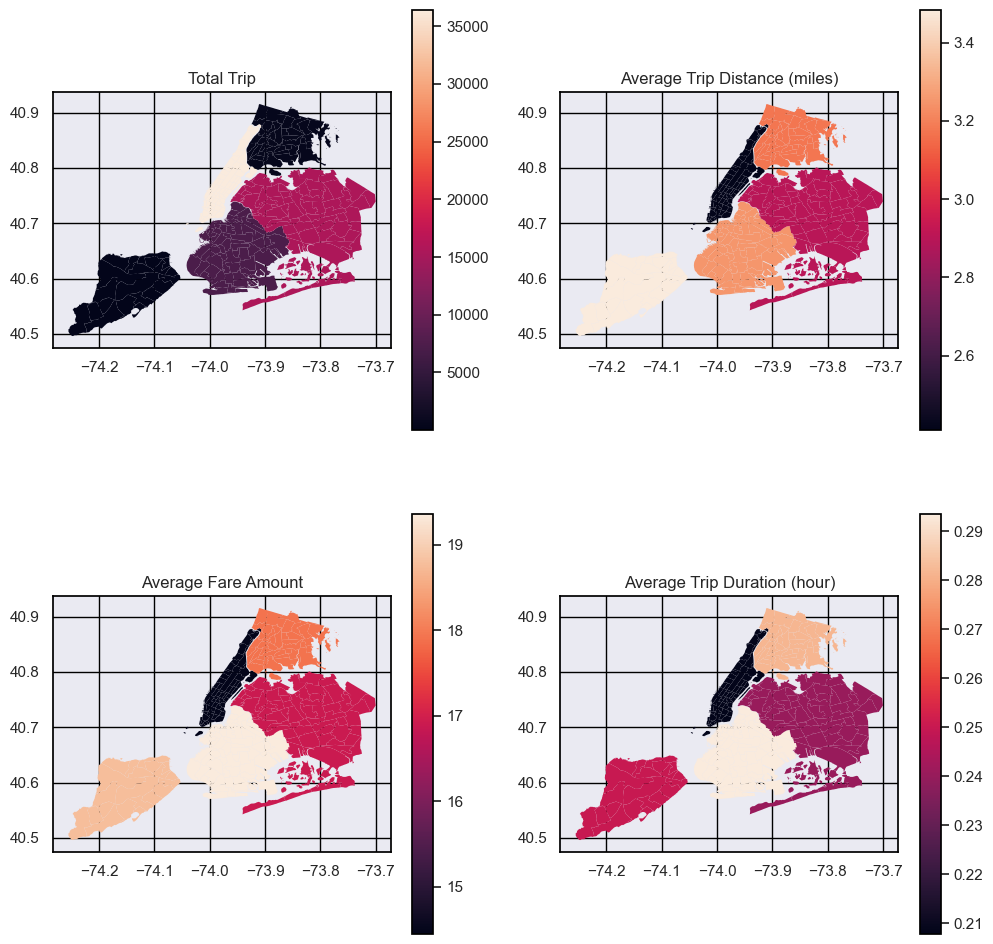

In [ ]:
data_trip_dis=tlc.groupby("PUborough")["trip_distance"].mean().reset_index()
data_map=loc_1
data_combined=pd.merge(data_map,data_trip_dis,how="left",on="PUborough")
geo_frame=gpd.GeoDataFrame(data=data_combined,geometry=gpd.GeoSeries.from_wkt(data_combined["PUgeom"]))

data_trip_count=tlc[["PUborough"]].value_counts().reset_index()
data_combined2=pd.merge(data_map,data_trip_count,how="left",on="PUborough")
geo_frame2=gpd.GeoDataFrame(data=data_combined2,geometry=gpd.GeoSeries.from_wkt(data_combined2["PUgeom"]))

data_trip_fare=tlc.groupby("PUborough")["fare_amount"].mean().reset_index()
data_map=loc_1
data_combined3=pd.merge(data_map,data_trip_fare,how="left",on="PUborough")
geo_frame3=gpd.GeoDataFrame(data=data_combined3,geometry=gpd.GeoSeries.from_wkt(data_combined3["PUgeom"]))

data_trip_dur=tlc.groupby("PUborough")["trip_dur"].mean().reset_index()
data_map=loc_1
data_combined4=pd.merge(data_map,data_trip_dur,how="left",on="PUborough")
geo_frame4=gpd.GeoDataFrame(data=data_combined4,geometry=gpd.GeoSeries.from_wkt(data_combined4["PUgeom"]))

fig,ax=plt.subplots(2,2,figsize=(12, 12))
geo_frame.plot(ax=ax[0,1],column="trip_distance",legend=True,edgecolor='none')
ax[0,1].set_title("Average Trip Distance (miles)")
geo_frame2.plot(ax=ax[0,0],column="count",legend=True,edgecolor='none')
ax[0,0].set_title("Total Trip")
geo_frame3.plot(ax=ax[1,0],column="fare_amount",legend=True,edgecolor='none')
ax[1,0].set_title("Average Fare Amount")
geo_frame4.plot(ax=ax[1,1],column="trip_dur",legend=True,edgecolor='none')
ax[1,1].set_title("Average Trip Duration (hour)")

plt.savefig("a.png",transparent=True)

Borough with higher average fare amount, trip distance, and trip duration have lower total trips. This happens because the trip distance trip duration of a trip, the higher the fare will be, this would cause customer to choose more cheap transportaion for long distance travel.

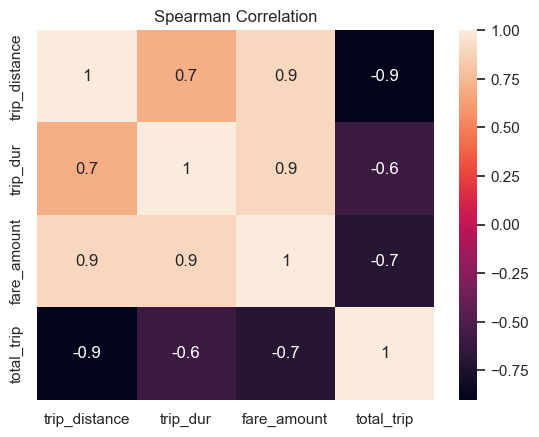

In [ ]:
data=tlc.groupby(["PUborough"])[["trip_distance","fare_amount","trip_dur"]].mean().reset_index()
data2=tlc["PUborough"].value_counts().reset_index()
data2.rename(columns={"count":"total_trip"},inplace=True)
final_data=pd.merge(data,data2)
sns.heatmap(final_data[["trip_distance","trip_dur","fare_amount","total_trip"]].corr("spearman"),annot=True)
plt.title("Spearman Correlation")
plt.savefig("a.png",transparent=True)

The correlation spearman shows that trip duration and trip distance have strong positive correlation with fare_amount. It's also shwon that total trips have strong negative correlation with trip duration, trip distance, and fare amount.

# Recommendation

<ul>
  <li>It's recomended to allocate taxi fleet in the weekdays especially on wednesday, Thursday and friday's rush hour because the taxi demand on the peroids are high and allocate less fleet on sunday to reduce operating cost</li>
  <li>The popularity of green taxi on other borough besides manhattan is still low, especially in staten island and Bronx, the taxi also rarely used to travel between borough, this is because customer in these borough uses taxi for longer duration and farther distance than in manhattan, recalibartaion of taxi's fare rate to make it affordable in these borough or giving discount would increase the trip's number</li>
</ul>